# AUTOENCODER

### Objective

### Description of model

1. Import Libraries


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.optimizers import Adam

2025-09-10 02:28:07.158200: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-10 02:28:08.393342: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-09-10 02:28:12.008725: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


2. Download Dataset

In [2]:
(x_train, _), (x_test, _) = cifar10.load_data()  # ignore labels for autoencoder

# normalize pixel values to [0, 1]
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 29s 0us/step
Training data shape: (50000, 32, 32, 3)
Testing data shape: (10000, 32, 32, 3)


3. Define Encoder 

In [3]:
input_img = Input(shape=(32, 32, 3))  # CIFAR-10 images are 32x32 RGB

# Encoder layers
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

2025-09-10 02:29:04.658821: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


4. Define Decoder

In [4]:
x = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)

decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)  # 3 channels for RGB

5. Compule Model

In [5]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=Adam(), loss='mse')  # mean squared error for reconstruction
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 16)       │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 3)      │           867 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,347 (52.14 KB)

 Trainable params: 13,347 (52.14 KB)

 Non-trainable params: 0 (0.00 B)

6. Train Model

In [7]:
history = autoencoder.fit(
    x_train, x_train, 
    epochs=4,
    batch_size=128,
    shuffle=True,
    validation_data=(x_test, x_test)
)

2025-09-10 02:31:16.416428: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 614400000 exceeds 10% of free system memory.
2025-09-10 02:31:19.918484: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/4
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step - loss: 0.0089

2025-09-10 02:33:47.862828: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 122880000 exceeds 10% of free system memory.


391/391 ━━━━━━━━━━━━━━━━━━━━ 159s 405ms/step - loss: 0.0079 - val_loss: 0.0068
Epoch 2/4
391/391 ━━━━━━━━━━━━━━━━━━━━ 122s 313ms/step - loss: 0.0063 - val_loss: 0.0059
Epoch 3/4
391/391 ━━━━━━━━━━━━━━━━━━━━ 108s 276ms/step - loss: 0.0057 - val_loss: 0.0055
Epoch 4/4
391/391 ━━━━━━━━━━━━━━━━━━━━ 117s 299ms/step - loss: 0.0054 - val_loss: 0.0052


7. Evaluate Model

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step


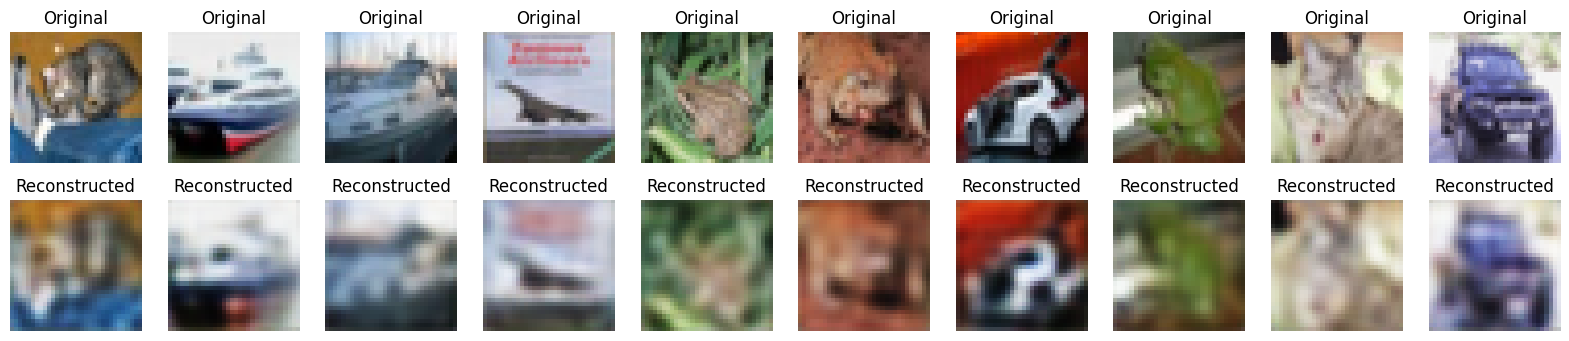

In [8]:
decoded_imgs = autoencoder.predict(x_test[:10])

n = 10  # number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i])
    plt.title("Original")
    plt.axis("off")
    
    # Reconstructed
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i])
    plt.title("Reconstructed")
    plt.axis("off")
plt.show()